In [2]:
import os
import uuid
import shutil
#import pylatex
import pandas as pd
import lightkurve as lk 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy import units as u

from datetime import datetime
from tqdm.notebook import tqdm
from multiprocessing import cpu_count, Pool
#from pylatex.section import Chapter, Subsection
#from pylatex import Document, Section, Figure, NoEscape, Command

%run pipeline.ipynb

import warnings
warnings.filterwarnings("ignore")

In [3]:
gaiatable=pd.read_csv('makingtable/cleanedgaiadata.csv')
id_table=pd.read_csv('makingtable/idswithdiscopaper.csv')

In [4]:
lcSPOC=get_lc_string('TIC-49072492-91-SPOC-120').normalize()

In [5]:
lcFFI=get_lc_string('TIC-49072492-91-FFI-200')
lcFFI.flux=lcFFI.flux+1

In [6]:
period=u.Quantity(0.6423,u.d)
bintime=u.Quantity(period/200,u.s)

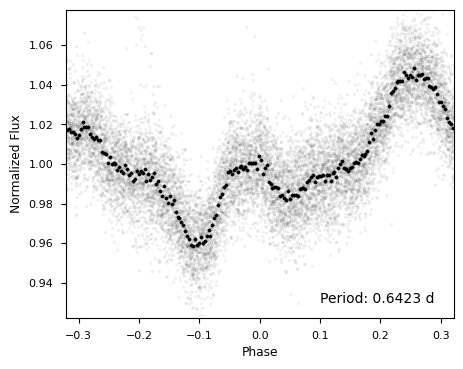

In [7]:
subgraph_phaselc(lcSPOC,period=period,bintime=bintime)

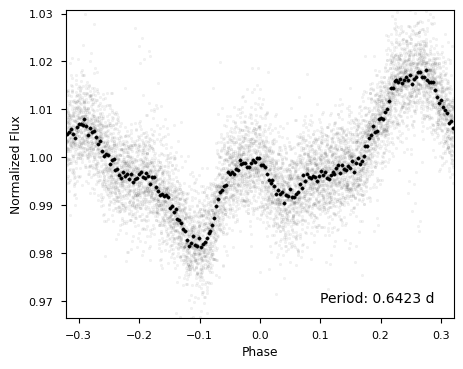

In [8]:
subgraph_phaselc(lcFFI,period=period,bintime=bintime)

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(10, 4))
subgraph_phaselc(lcSPOC,period=period,bintime=bintime,ax=ax1,showperiod=False)
subgraph_phaselc(lcFFI,period=period,bintime=bintime,ax=ax2,showperiod=False)
ax2.set_ylabel('')
ax1.set_title('SPOC 120s')
ax2.set_title('FFI 200s')
fig.suptitle('Sector 91 TIC 49072492')
fig.savefig(f'multiplots/{16}/120vs200.png',bbox_inches='tight')

In [23]:
lcSPOC=get_lc_string('TIC-280945693-38-SPOC-120').normalize()
lcFFI=get_lc_string('TIC-280945693-38-FFI-200')
lcFFI.flux=lcFFI.flux+1
period=u.Quantity(0.6363,u.d)
bintime=u.Quantity(period/200,u.s)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(10, 4))
subgraph_phaselc(lcSPOC,period=period,bintime=bintime,ax=ax1,showperiod=False)
subgraph_phaselc(lcFFI,period=period,bintime=bintime,ax=ax2,showperiod=False)
ax2.set_ylabel('')
ax1.set_title('SPOC 120s')
ax2.set_title('FFI 10min')
fig.suptitle('Sector 38 TIC 280945693')
fig.savefig(f'multiplots/{21}/120vs10.png',bbox_inches='tight')

In [52]:
#all for TIC 201789285 in sectors 2, 3, 29, 30, 69, 96
seclength=np.array([[2,3,29,30,69,96],['30min','30min','10min','10min','200s','200s']]).T
period=u.Quantity(0.15166667,u.d)
bintime=u.Quantity(period/200,u.s)

for sec, length in TIClength:
    lcSPOC=get_lc_string(f'TIC-201789285-{sec}-SPOC-120').normalize()
    lcFFI=get_lc_string(f'TIC-201789285-{sec}-FFI-{length}')
    lcFFI.flux=lcFFI.flux+1
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(10, 4))
    subgraph_phaselc(lcSPOC,period=period,bintime=bintime,ax=ax1,showperiod=False)
    subgraph_phaselc(lcFFI,period=period,bintime=bintime,ax=ax2,showperiod=False)
    ax2.set_ylabel('')
    ax1.set_title('SPOC 120s')
    ax2.set_title(f'FFI {length}')
    fig.suptitle(f'Sector {sec} TIC 201789285')
    fig.savefig(f'multiplots/{97}/{sec}-120vs{length}.png',bbox_inches='tight')

In [89]:
#all for TIC 425937691 in sectors 1,2,28,68,69
seclength=np.array([[1,2,28,68,69],['30min','30min','10min','200s','200s']]).T
period=u.Quantity((4.816/24),u.d)
bintime=u.Quantity(period/200,u.s)

for sec, length in seclength:
    lcSPOC=get_lc_string(f'TIC-425937691-{sec}-SPOC-120').normalize()
    lcFFI=get_lc_string(f'TIC-425937691-{sec}-FFI-{length}')
    lcFFI.flux=lcFFI.flux+1
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(10, 4))
    subgraph_phaselc(lcSPOC,period=period,bintime=bintime,ax=ax1,showperiod=False)
    subgraph_phaselc(lcFFI,period=period,bintime=bintime,ax=ax2,showperiod=False)
    ax2.set_ylabel('')
    ax1.set_title('SPOC 120s')
    ax2.set_title(f'FFI {length}')
    fig.suptitle(f'Sector {sec} TIC 425937691')
    fig.savefig(f'multiplots/{99}/{sec}-120vs{length}.png',bbox_inches='tight')

In [113]:
lcSPOC1=get_lc_string(f'TIC-425937691-{1}-SPOC-120').normalize()
lcFFI1=get_lc_string(f'TIC-425937691-{1}-FFI-{'30min'}')
lcFFI1.flux=lcFFI1.flux+1

lcSPOC28=get_lc_string(f'TIC-425937691-{28}-SPOC-120').normalize()
lcFFI28=get_lc_string(f'TIC-425937691-{28}-FFI-{'10min'}')
lcFFI28.flux=lcFFI28.flux+1

lcSPOC68=get_lc_string(f'TIC-425937691-{68}-SPOC-120').normalize()
lcFFI68=get_lc_string(f'TIC-425937691-{68}-FFI-{'200s'}')
lcFFI68.flux=lcFFI68.flux+1

In [162]:
fig, axs = plt.subplot_mosaic([
        ['1','2'],
        ['3','4'],
        ['5','6']
    ], figsize=(10,10), sharex=True, layout="constrained")

subgraph_phaselc(lcSPOC1,period=period,bintime=bintime,ax=axs['1'],showperiod=False)
subgraph_phaselc(lcSPOC28,period=period,bintime=bintime,ax=axs['3'],showperiod=False)
subgraph_phaselc(lcSPOC68,period=period,bintime=bintime,ax=axs['5'],showperiod=False)
subgraph_phaselc(lcFFI1,period=period,bintime=bintime,ax=axs['2'],showperiod=False)
subgraph_phaselc(lcFFI28,period=period,bintime=bintime,ax=axs['4'],showperiod=False)
subgraph_phaselc(lcFFI68,period=period,bintime=bintime,ax=axs['6'],showperiod=False)

axs['2'].set_ylabel('')
axs['4'].set_ylabel('')
axs['6'].set_ylabel('')

axs['1'].set_xlabel('')
axs['2'].set_xlabel('')
axs['3'].set_xlabel('')
axs['4'].set_xlabel('')

axs['1'].set_title('SPOC 120s')
axs['3'].set_title('SPOC 120s')
axs['5'].set_title('SPOC 120s')

axs['2'].set_title('FFI 30min')
axs['4'].set_title('FFI 10min')
axs['6'].set_title('FFI 200s')

fig.get_layout_engine().set(h_pad=4/72, hspace=0.1)

fig.text(0.52, 0.975, 'Sector 1', ha='center', va='top')
fig.text(0.52, 0.655, 'Sector 28', ha='center', va='top')
fig.text(0.52, 0.34, 'Sector 68', ha='center', va='top')

fig.suptitle('TIC 425937691')

fig.savefig(f'multiplots/{99}/cadence.png',bbox_inches='tight')

In [166]:
lcSPOC28

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,,,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
2061.8540021673025,1.0061481e+00,8.1012445e-03,3.0379437e-03,600765,1821.61782,575.86701,5.4261432e+02,4.2628937e+00,4.3892245e+02,1.8181051e+00,7.8175696e+02,6.2945046e+00,0,———,———,———,———,1821.61782,3.6372982e-03,575.86701,5.4550502e-03,-8.5125556e-03,-2.8640611e-02
2061.855391077932,9.8985779e-01,8.0762990e-03,3.0379661e-03,600766,1821.61877,575.86360,5.3339685e+02,4.2497668e+00,4.3622534e+02,1.8176636e+00,7.6909967e+02,6.2751226e+00,0,———,———,———,———,1821.61877,3.6886025e-03,575.86360,5.5356203e-03,-5.2546775e-03,-2.4871694e-02
2061.8567799885604,9.9489218e-01,8.0883410e-03,3.0379884e-03,600767,1821.61913,575.86143,5.3587384e+02,4.2561035e+00,4.3840390e+02,1.8159256e+00,7.7301129e+02,6.2844791e+00,0,———,———,———,———,1821.61913,3.6774015e-03,575.86143,5.5356841e-03,-5.1419097e-03,-2.8676787e-02
2061.8581688991894,9.6288329e-01,8.0467658e-03,3.0380108e-03,600768,1821.62309,575.86430,5.1976117e+02,4.2342267e+00,4.3835471e+02,1.8172961e+00,7.4814105e+02,6.2521758e+00,0,———,———,———,———,1821.62309,3.7712601e-03,575.86430,5.6642690e-03,-7.4269865e-03,-2.7369890e-02
2061.859557809819,9.8833877e-01,8.0836872e-03,3.0380331e-03,600769,1821.61667,575.86868,5.3274719e+02,4.2536550e+00,4.3979614e+02,1.8215294e+00,7.6791943e+02,6.2808633e+00,0,———,———,———,———,1821.61667,3.6927059e-03,575.86868,5.5547003e-03,-4.5461236e-03,-2.3060098e-02
2061.860946720448,9.7248453e-01,8.0641191e-03,3.0380555e-03,600770,1821.62009,575.87091,5.2396442e+02,4.2433581e+00,4.4223859e+02,1.8203688e+00,7.5560101e+02,6.2656593e+00,0,———,———,———,———,1821.62009,3.7468423e-03,575.87091,5.6291339e-03,-6.4644748e-03,-2.9147912e-02
2061.8623356310763,9.7875482e-01,8.0597391e-03,3.0380778e-03,600771,1821.61571,575.87309,5.2682550e+02,4.2410531e+00,4.4124686e+02,1.8162469e+00,7.6047290e+02,6.2622557e+00,0,———,———,———,———,1821.61571,3.7243888e-03,575.87309,5.5995844e-03,-7.1537760e-03,-2.2950906e-02
2061.863724541474,9.8614442e-01,8.0790240e-03,3.0381000e-03,600772,1821.62005,575.86489,5.3124261e+02,4.2512012e+00,4.4036380e+02,1.8172745e+00,7.6621448e+02,6.2772403e+00,0,———,———,———,———,1821.62005,3.7050124e-03,575.86489,5.5619357e-03,-5.3711943e-03,-2.7333507e-02


In [168]:
lcSPOC68

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,,,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
3154.613997550442,———,———,2.9941371e-03,8325318,1792.77765,319.64689,5.6633575e+02,1.2884105e+01,1.5051729e+03,5.7433896e+00,———,———,1000000000000,———,———,———,———,1792.77765,1.3831045e-02,319.64689,1.4321400e-02,2.3544898e-02,1.2807557e-02
3154.614229036705,———,———,2.9941420e-03,8325319,1792.75928,319.56756,5.5558905e+02,1.2844872e+01,1.4964373e+03,5.7368026e+00,———,———,1000000000000,———,———,———,———,1792.75928,1.4070684e-02,319.56756,1.4853724e-02,-2.4959312e-03,-7.9433158e-02
3154.6144605229683,———,———,2.9941469e-03,8325320,1792.75424,319.56126,5.0718439e+02,1.2801828e+01,1.5109203e+03,5.7696400e+00,———,———,1000000000000,———,———,———,———,1792.75424,1.5271992e-02,319.56126,1.6336814e-02,-5.9526754e-03,-9.0932891e-02
3154.6146920094648,———,———,2.9941520e-03,8325321,1792.75194,319.57882,5.3935181e+02,1.2814267e+01,1.4970712e+03,5.7359247e+00,———,———,1000000000000,———,———,———,———,1792.75194,1.4441464e-02,319.57882,1.5299519e-02,-1.3039579e-02,-9.6577957e-02
3154.614923495728,———,———,2.9941569e-03,8325322,1792.76447,319.57352,5.2913654e+02,1.2801579e+01,1.4968295e+03,5.7494097e+00,———,———,1000000000000,———,———,———,———,1792.76447,1.4683513e-02,319.57352,1.5578292e-02,-4.7119828e-03,-9.7637020e-02
3154.615154981992,———,———,2.9941618e-03,8325323,1792.74090,319.56254,5.2696735e+02,1.2803794e+01,1.4976884e+03,5.7356591e+00,———,———,1000000000000,———,———,———,———,1792.74090,1.4768578e-02,319.56254,1.5703758e-02,1.7471965e-03,-1.1921872e-01
3154.615386468256,———,———,2.9941667e-03,8325324,1792.75545,319.58615,5.2506653e+02,1.2773838e+01,1.4939855e+03,5.7338181e+00,———,———,1000000000000,———,———,———,———,1792.75545,1.4700196e-02,319.58615,1.5596751e-02,-5.0893426e-03,-4.8419774e-02
3154.6156179547525,———,———,2.9941718e-03,8325325,1792.73428,319.56936,5.4139868e+02,1.2819553e+01,1.4946954e+03,5.7411103e+00,———,———,1000000000000,———,———,———,———,1792.73428,1.4389671e-02,319.56936,1.5269294e-02,-7.3152594e-03,-8.2275361e-02


In [174]:
search_result = lk.search_lightcurve('TIC 425937691',author='SPOC',exptime=120,sector=68)